# Course Notes
Use this workspace to take notes, store code snippets, or build your own interactive cheatsheet! For courses that use data, the datasets will be available in the `datasets` folder.


In [3]:
# Import any packages you want to use here
import pandas as pd
import numpy as np
import nltk
import re
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize, word_tokenize
import gensim
import itertools
from gensim import corpora, models

# Regular expressions & word tokenization


## Word tokenization with NLTK

In [4]:
# Add your code snippets here
holy_grail = pd.read_csv('datasets/grail.txt', sep ='\t')
holy_grail

,SCENE 1: [wind] [clop clop clop]
0,KING ARTHUR: Whoa there! [clop clop clop]
1,SOLDIER #1: Halt! Who goes there?
2,"ARTHUR: It is I, Arthur, son of Uther Pendrago..."
3,SOLDIER #1: Pull the other one!
4,"ARTHUR: I am, ... and this is my trusty serva..."
...,...
1185,"OFFICER #1: Pull that off. My, that's an offe..."
1186,OFFICER #2: Come on. Back with 'em. Back. R...
1187,INSPECTOR: Everything? [squeak]
1188,"OFFICER #1: All right, sonny. That's enough. ..."


Utilize word_tokenize and sent_tokenize from nltk.tokenize to tokenize both words and sentences from Python strings 

In [5]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/repl/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
scene_one = str(holy_grail)
# Split scene_one into sentences: sentences
sentences = sent_tokenize(scene_one)

# Use word_tokenize to tokenize the fourth sentence: tokenized_sent
tokenized_sent = word_tokenize(sentences[3])
tokenized_sent

['2',
 'ARTHUR',
 ':',
 'It',
 'is',
 'I',
 ',',
 'Arthur',
 ',',
 'son',
 'of',
 'Uther',
 'Pendrago',
 '...',
 '3',
 'SOLDIER',
 '#',
 '1',
 ':',
 'Pull',
 'the',
 'other',
 'one',
 '!']

In [7]:
# Make a set of unique tokens in the entire scene: unique_tokens
unique_tokens = set(word_tokenize(scene_one))

# Print the unique tokens result
print(unique_tokens)

{'with', ']', ',', 'trusty', 'Halt', '...', 'other', '1190', '1', '1189', '.', 'SOLDIER', 'sonny', '3', 'rows', 'the', 'Pull', '#', 'KING', 'this', '1185', "'em", 'Back', 'CAMERAMAN', 'there', 'ARTHUR', '4', 'off', 'Christ', '0', 'right', "'s", '1187', '?', 'That', 'All', 'Everything', 'Uther', 'INSPECTOR', '1186', 'Pendrago', 'SCENE', '2', 'son', 'is', 'one', 'squeak', '1188', 'Arthur', 'serva', 'that', 'wind', 'Whoa', '!', 'I', 'OFFICER', 'my', 'offe', 'x', '[', 'an', 'of', ':', 'on', 'Come', 'R', 'and', 'It', 'Who', 'enough', 'My', 'columns', 'am', 'goes', 'clop'}


## More regex with re.search()
Utilize re.search() and re.match() to find specific tokens

In [8]:
# Search for the first occurrence of "Arthur" in scene_one: match
match = re.search("Arthur", scene_one)

# Print the start and end indexes of match
print(match.start(), match.end())

191 197


In [9]:
# Write a regular expression to search for anything in square brackets: pattern1
pattern1 = r"\[.*\]"

# Use re.search to find the first text in square brackets
print(re.search(pattern1, scene_one))

<re.Match object; span=(31, 54), match='[wind] [clop clop clop]'>


In [10]:
# Find the script notation (e.g. Character:) at the beginning of the fourth sentence and print it
pattern2 = r"[\d\s\w+d]+:"
print(re.match(pattern2, sentences[3]))

<re.Match object; span=(0, 13), match='2     ARTHUR:'>


## Regex with NLTK tokenization
The nltk.tokenize.TweetTokenizer class gives us some extra methods and attributes for parsing tweets. Unlike the syntax for the regex library, with nltk_tokenize() you pass the pattern as the second argument.

In [11]:
# Import the necessary modules
from nltk.tokenize import regexp_tokenize, TweetTokenizer
tweets = ['This is the best #nlp exercise ive found online! #python',
 '#NLP is super fun! <3 #learning',
 'Thanks @datacamp :) #nlp #python']

In [12]:
# Import the necessary modules
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import TweetTokenizer
# Define a regex pattern to find hashtags: pattern1
pattern1 = r"#\w+"
# Use the pattern on the first tweet in the tweets list
hashtags = regexp_tokenize(tweets[0], pattern1)
print(hashtags)

['#nlp', '#python']


In [13]:
# Import the necessary modules
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import TweetTokenizer
# Write a pattern that matches both mentions (@) and hashtags
pattern2 = r"([#\@]\w+)"
# Use the pattern on the last tweet in the tweets list
mentions_hashtags = regexp_tokenize(tweets[-1], pattern2)
print(mentions_hashtags)

['@datacamp', '#nlp', '#python']


In [14]:
# Import the necessary modules
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import TweetTokenizer
# Use the TweetTokenizer to tokenize all tweets into one list
tknzr = TweetTokenizer()
all_tokens = [tknzr.tokenize(t) for t in tweets]
print(all_tokens)

[['This', 'is', 'the', 'best', '#nlp', 'exercise', 'ive', 'found', 'online', '!', '#python'], ['#NLP', 'is', 'super', 'fun', '!', '<3', '#learning'], ['Thanks', '@datacamp', ':)', '#nlp', '#python']]


## Non-ascii tokenization

In [15]:
german_text = 'Wann gehen wir Pizza essen? 🍕 Und fährst du mit Über? 🚕'

In [16]:
# Tokenize and print all words in german_text
all_words = word_tokenize(german_text)
print(all_words)

['Wann', 'gehen', 'wir', 'Pizza', 'essen', '?', '🍕', 'Und', 'fährst', 'du', 'mit', 'Über', '?', '🚕']


In [17]:
# Tokenize and print only capital words
capital_words = r"[A-Z\Ü]\w+"
print(regexp_tokenize(german_text, capital_words))

['Wann', 'Pizza', 'Und', 'Über']


In [18]:
# Tokenize and print only emoji
emoji = "['\U0001F300-\U0001F5FF'|'\U0001F600-\U0001F64F'|'\U0001F680-\U0001F6FF'|'\u2600-\u26FF\u2700-\u27BF']"
print(regexp_tokenize(german_text, emoji))

['🍕', '🚕']


## Charting word length with NLTK

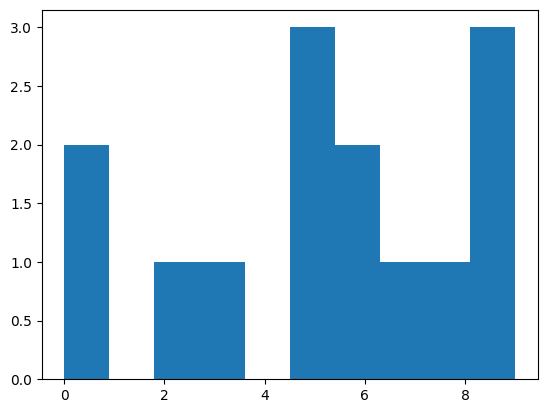

In [19]:
# Split the script into lines: lines
lines = scene_one.split('\n')

# Replace all script lines for speaker
pattern = "[A-Z]{2,}(\s)?(#\d)?([A-Z]{2,})?:"
lines = [re.sub(pattern, '', l) for l in lines]

# Tokenize each line: tokenized_lines
tokenized_lines = [regexp_tokenize(s, '\w+') for s in lines]

# Make a frequency list of lengths: line_num_words
line_num_words = [len(t_line) for t_line in tokenized_lines]

# Plot a histogram of the line lengths
plt.hist(line_num_words)

# Show the plot
plt.show()

# Word counts with bag-of-words

## Building a Counter with bag-of-words

In [20]:
import zipfile

# Opening a zip file in read mode
with zipfile.ZipFile('datasets/Wikipedia%20articles.zip', 'r') as zip:
    # Listing the contents of the zip file
    print(zip.namelist(), '\n')
    # Reading the contents of a file in the zip file
    with zip.open('Wikipedia articles/wiki_text_bug.txt', 'r') as file:
        content = file.read()
    # Decoding the binary data into a text string
        article = content.decode('utf-8')
    with zip.open('Wikipedia articles/wiki_text_reversing.txt', 'r') as file1:
        content1 = file1.read()
    # Decoding the binary data into a text string
        article1 = content1.decode('utf-8')
    # Displaying the contents of the file
    print(type(article), type(article1))

['Wikipedia articles/', 'Wikipedia articles/wiki_text_bug.txt', 'Wikipedia articles/wiki_text_computer.txt', 'Wikipedia articles/wiki_text_crash.txt', 'Wikipedia articles/wiki_text_debugger.txt', 'Wikipedia articles/wiki_text_debugging.txt', 'Wikipedia articles/wiki_text_exception.txt', 'Wikipedia articles/wiki_text_hopper.txt', 'Wikipedia articles/wiki_text_language.txt', 'Wikipedia articles/wiki_text_malware.txt', 'Wikipedia articles/wiki_text_program.txt', 'Wikipedia articles/wiki_text_reversing.txt', 'Wikipedia articles/wiki_text_software.txt'] 

<class 'str'> <class 'str'>


In [21]:
# Import Counter
from collections import Counter

# Tokenize the article: tokens
tokens = word_tokenize(article)

# Convert the tokens into lowercase: lower_tokens
lower_tokens = [t.lower() for t in tokens]

# Create a Counter with the lowercase tokens: bow_simple
bow_simple = Counter(lower_tokens)
# Print the 10 most common tokens
print(bow_simple.most_common(10))

[(',', 295), ('the', 282), ('.', 220), ("''", 158), ('a', 155), ('of', 138), ('to', 131), ('``', 119), ('in', 103), ('{', 102)]


## Text preprocessing practice

In [22]:
# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /home/repl/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/repl/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/repl/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [23]:
# Retain alphabetic words: alpha_only
alpha_only = [t for t in lower_tokens if t.isalpha()]

# Remove all stop words: no_stops
no_stops = [t for t in alpha_only  if t not in stopwords.words('english')]

# Instantiate the WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Lemmatize all tokens into a new list: lemmatized
lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]

# Create the bag-of-words: bow
bow = Counter(lemmatized)

# Print the 10 most common tokens
print(bow.most_common(10))

[('bug', 126), ('software', 55), ('may', 45), ('computer', 42), ('code', 35), ('error', 33), ('program', 30), ('cite', 21), ('ref', 18), ('release', 18)]


## Creating and querying a corpus with gensim

In [24]:
# Opening a zip file in read mode
with zipfile.ZipFile('datasets/News%20articles.zip', 'r') as zip:
    # Listing the contents of the zip file
    print(zip.namelist(), '\n')
    # Reading the contents of a file in the zip file
    with zip.open('News articles/articles.txt', 'r') as file2:
        content2 = file2.read()
    # Decoding the binary data into a text string
        article2 = content2.decode('utf-8')
    # Displaying the contents of the file
    print(type(article2))

['News articles/', 'News articles/articles.txt', 'News articles/blaise.txt', 'News articles/french.txt', 'News articles/uber_apple.txt'] 

<class 'str'>


In [25]:
# Tokenize the second and third article
tokens1 = word_tokenize(article1)
tokens2 = word_tokenize(article2)
# Convert the tokens into lowercase: lower_tokens
lower_tokens1 = [t.lower() for t in tokens1]
lower_tokens2 = [t.lower() for t in tokens2]
# Retain alphabetic words: alpha_only
alpha_only1 = [t for t in lower_tokens1 if t.isalpha()]
alpha_only2 = [t for t in lower_tokens2 if t.isalpha()]
# Remove all stop words: no_stops
no_stops1 = [t for t in alpha_only1  if t not in stopwords.words('english')]
no_stops2 = [t for t in alpha_only2  if t not in stopwords.words('english')]
# Lemmatize all tokens into a new list: lemmatized
lemmatized1 = [wordnet_lemmatizer.lemmatize(t) for t in no_stops1]
lemmatized2 = [wordnet_lemmatizer.lemmatize(t) for t in no_stops2]
#Create a list of list of lemmatize tokens of the three articles
articles = [lemmatized,  lemmatized1, lemmatized2]
len(articles)

3

In [26]:
# Import Dictionary
from gensim import corpora

# Create a Dictionary from the articles: dictionary
dictionary = corpora.Dictionary(articles)

# Select the id for "computer": computer_id
computer_id = dictionary.token2id.get("computer")

# Use computer_id with the dictionary to print the word
print(dictionary.get(computer_id))

computer


In [27]:
# Create a MmCorpus: corpus
corpus = [dictionary.doc2bow(article) for article in articles]

# Print the first 10 word ids with their frequency counts from the fifth document
print(corpus[1][:10])

[(1, 1), (4, 3), (9, 1), (13, 4), (14, 2), (16, 2), (18, 1), (21, 1), (31, 2), (32, 1)]


## Gensim bag-of-words
- 'defaultdict' allows us to initialize a dictionary that will assign a default value to non-existent keys. By supplying the argument int, we are able to ensure that any non-existent keys are automatically assigned a default value of 0. This makes it ideal for storing the counts of words in this exercise.

- 'itertools.chain.from_iterable()' allows us to iterate through a set of sequences as if they were one continuous sequence. Using this function, we can easily iterate through our corpus object (which is a list of lists).

In [28]:
# Save the first document: doc
doc = corpus[0]

# Sort the doc for frequency: bow_doc
bow_doc = sorted(doc, key=lambda w: w[1], reverse=True)

# Print the top 5 words of the document alongside the count
for word_id, word_count in bow_doc[:5]:
    print(dictionary.get(word_id), word_count)

bug 126
software 55
may 45
computer 42
code 35


In [29]:
# Create the defaultdict: total_word_count
from collections import defaultdict
total_word_count = defaultdict(int)
for word_id, word_count in itertools.chain.from_iterable(corpus):
    total_word_count[word_id] += word_count

# Create a sorted list from the defaultdict: sorted_word_count 
sorted_word_count = sorted(total_word_count.items(), key=lambda w: w[1], reverse=True) 

# Print the top 5 words across all documents alongside the count
for word_id, word_count in sorted_word_count[:5]:
    print(dictionary.get(word_id), word_count)

bug 127
software 113
engineering 98
computer 73
reverse 72


## Tf-idf with Wikipedia

In [30]:
# Create a new TfidfModel using the corpus: tfidf
tfidf = models.TfidfModel(corpus)

# Calculate the tfidf weights of doc: tfidf_weights
tfidf_weights = tfidf[doc]

# Print the first five weights
print(tfidf_weights[:5])

[(0, 0.012669176945431657), (2, 0.025338353890863315), (3, 0.012669176945431657), (4, 0.02337908128648636), (5, 0.012669176945431657)]


In [31]:
# Sort the weights from highest to lowest: sorted_tfidf_weights
sorted_tfidf_weights = sorted(tfidf_weights, key=lambda w: w[1], reverse=True)

# Print the top 5 weighted words
for term_id, weight in sorted_tfidf_weights[:5]:
    print(dictionary.get(term_id,), weight)

bug 0.5891528484194563
priority 0.22804518501776982
release 0.22804518501776982
defect 0.20270683112690652
severity 0.20270683112690652


# Named Entity Recognition

## NER with NLTK - use nltk to find the named entities in this article.

In [32]:
# Opening a zip file in read mode
with zipfile.ZipFile('datasets/News%20articles.zip', 'r') as zip:
    # Listing the contents of the zip file
    print(zip.namelist(), '\n')
    # Reading the contents of a file in the zip file
    with zip.open('News articles/uber_apple.txt', 'r') as file3:
        content3 = file3.read()
    # Decoding the binary data into a text string
        article3 = content3.decode('utf-8')
    # Displaying the contents of the file
    print(type(article3))

['News articles/', 'News articles/articles.txt', 'News articles/blaise.txt', 'News articles/french.txt', 'News articles/uber_apple.txt'] 

<class 'str'>


In [33]:
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/repl/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/repl/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /home/repl/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [34]:
# Tokenize the article into sentences: sentences
sentences = nltk.sent_tokenize(article3)

# Tokenize each sentence into words: token_sentences
token_sentences = [nltk.word_tokenize(sent) for sent in sentences]

# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences] 

#  Chunk each tagged sentence into named-entity chunks 
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary =True)

# Test for stems of the tree with 'NE' tags
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, "label") and chunk.label() == "NE":
            print(chunk)


(NE Uber/NNP)
(NE Beyond/NN)
(NE Apple/NNP)
(NE Uber/NNP)
(NE Uber/NNP)
(NE Travis/NNP Kalanick/NNP)
(NE Tim/NNP Cook/NNP)
(NE Apple/NNP)
(NE Silicon/NNP Valley/NNP)
(NE CEO/NNP)
(NE Yahoo/NNP)
(NE Marissa/NNP Mayer/NNP)


## Charting practice
We'll use some extracted named entities and their groupings from a series of newspaper articles to chart the diversity of named entity types in the articles.

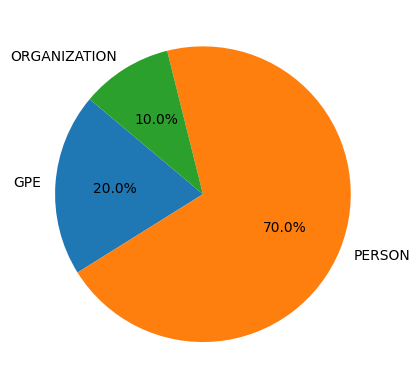

In [35]:
#  Chunk each tagged sentence into named-entity chunks with non-binary category names
chunked_sentences1 = nltk.ne_chunk_sents(pos_sentences, binary =False)

# Create the defaultdict: ner_categories
ner_categories = defaultdict(int)

# Create the nested for loop
for sent in list(chunked_sentences1):
    for chunk in sent:
        if hasattr(chunk, 'label'):
            ner_categories[chunk.label()] += 1
            
# Create a list from the dictionary keys for the chart labels: labels
labels = list(ner_categories.keys())

# Create a list of the values: values
values = [ner_categories.get(v) for v in labels]

# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140) # autopct - add percentages to the chart 
                                                                 # startangl - rotate the initial start angle

# Display the chart
plt.show()

## Introduction to SpaCy

In [36]:
import spacy.cli
spacy.cli.download("en_core_web_sm")

2023-04-22 14:39:21.276786: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-04-22 14:39:21.276816: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-04-22 14:39:21.276837: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (866d428b-98d5-4457-be23-553ca5323f2c): /proc/driver/nvidia/version does not exist


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 104.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')



[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [37]:
# Import spacy
import spacy

# Instantiate the English model: nlp
nlp = spacy.load('en_core_web_sm', disable=['tagger', 'parser', 'matcher'])

# Create a new document: doc
doc = nlp(article)

# Print all of the found entities and their labels
for ent in doc.ents:
    print(ent.label_, ent.text)

ORG MediaWiki
ORG Wikipedia
ORG Wikipedia
DATE August 2015
DATE September 2012
PERSON and/or bugs
DATE the 1980s
DATE 1996
ORG the European Space Agency's
MONEY US$1&nbsp;billion
CARDINAL 5
TIME less than a minute
DATE June 1994
ORG Royal Air Force CH-47
DATE 1994
GPE Scotland
ORG the Mull of Kintyre
CARDINAL 29
ORG Computer Weekly''
ORG House of Lords
ORG FADEC|engine
PERSON Simon Rogerson
DATE September 24, 2012
DATE 2002
ORG the US Department of Commerce's
ORG National Institute of Standards and Technology
GPE US
MONEY an estimated $59&nbsp;billion
DATE annually
PERCENT about 0.6 percent
PERSON Software
GPE US
DATE June 10, 2009
DATE September 24, 2012
DATE June 10, 2009
ORG jargon
DATE many decades
PERSON Thomas Edison
DATE 1878
PERSON quote|It
ORDINAL first
DATE months
ORG Puskas
DATE 13 November 1878
ORG Edison
ORG Edison National Laboratory
ORG U.S. National Park Service
GPE West Orange
GPE N.J.
PERSON Thomas Parke
ORG Century of Invention
DATE 1870-1970|url={{google
PERSON Peng

## Multilingual NER with polyglot

### French NER with polyglot I

In [38]:
!pip install polyglot
!pip install pyicu
!pip install pycld2
!pip install Morfessor

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [39]:
# Opening a zip file in read mode
with zipfile.ZipFile('datasets/News%20articles.zip', 'r') as zip:
    # Reading the contents of a file in the zip file
    with zip.open('News articles/french.txt', 'r') as file:
        content_fr = file.read()
    # Decoding the binary data into a text string
        article_fr = content_fr.decode('utf-8')
    # Displaying the contents of the file
    print(type(article_fr))

<class 'str'>


In [40]:
from polyglot.downloader import downloader
downloader.download("embeddings2.fr")
downloader.download("ner2.fr")

[polyglot_data] Downloading package embeddings2.fr to
[polyglot_data]     /home/repl/polyglot_data...
[polyglot_data]   Package embeddings2.fr is already up-to-date!
[polyglot_data] Downloading package ner2.fr to
[polyglot_data]     /home/repl/polyglot_data...
[polyglot_data]   Package ner2.fr is already up-to-date!


True

In [41]:
from polyglot.text import Text

# Create a new text object using Polyglot's Text class: txt
txt = Text(article_fr)

# Print each of the entities found
for ent in txt.entities:
    print(ent)
    
# Print the type of ent
print(type(ent))


['Charles', 'Cuvelliez']
['Charles', 'Cuvelliez']
['Bruxelles']
['l’IA']
['Julien', 'Maldonato']
['Deloitte']
['Ethiquement']
['l’IA']
['.']
<class 'polyglot.text.Chunk'>


In [42]:
# Create the list of tuples: entities
entities = [(ent.tag, ' '.join(ent)) for ent in txt.entities]

# Print entities
print(entities)

[('I-PER', 'Charles Cuvelliez'), ('I-PER', 'Charles Cuvelliez'), ('I-ORG', 'Bruxelles'), ('I-PER', 'l’IA'), ('I-PER', 'Julien Maldonato'), ('I-ORG', 'Deloitte'), ('I-PER', 'Ethiquement'), ('I-LOC', 'l’IA'), ('I-PER', '.')]


### How many of the entities contain the words "Cuvelliez" or "Charles"

In [43]:
# Initialize the count variable: count
count = 0

# Iterate over all the entities
for ent in txt.entities:
    # Check whether the entity contains "Cuvelliez" or "Charles"
    if "Cuvelliez" in ent or "Ethiquement" in ent:
        # Increment count
        count +=1

# Print count
print(count)

# Calculate the percentage of entities that refer to "Cuvelliez": percentage
percentage = count / len(txt.entities)
print(percentage)


3
0.3333333333333333


# Classifying fake news using supervised learning with NLP

## Building word count vectors with scikit-learn

In [4]:
# Add your code snippets here
df = pd.read_csv('datasets/IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


### CountVectorizer for text classification

In [5]:
# Import the necessary modules
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Create a series to store the labels: y
y = df.sentiment

# Create training and test sets
X_train, X_test, y_train, y_test =train_test_split(df['review'], y, test_size = 0.33, random_state = 53)

# Initialize a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer(stop_words='english')

# Transform the training data using only the 'text' column values: count_train 
count_train = count_vectorizer.fit_transform(X_train)

# Transform the test data using only the 'text' column values: count_test 
count_test = count_vectorizer.transform(X_test)

# Print the first 10 features of the count_vectorizer
print(count_vectorizer.get_feature_names()[:10])

['00', '000', '00000000000', '00000001', '00001', '00015', '000s', '001', '007', '0079']


In [17]:
# Print the first 5 vectors of the count training data
print(count_train.A[:5])

### TfidfVectorizer for text classification

In [6]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TfidfVectorizer object: tfidf_vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_df =0.7)

# Transform the training data: tfidf_train 
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data: tfidf_test 
tfidf_test = tfidf_vectorizer.transform(X_test)

# Print the first 10 features
print(tfidf_vectorizer.get_feature_names()[:10])

['00', '000', '00000000000', '00000001', '00001', '00015', '000s', '001', '007', '0079']


In [ ]:
# Print the first 5 vectors of the tfidf training data
print(tfidf_train.A[:5])

### Inspecting the vectors

In [ ]:
# Create the CountVectorizer DataFrame: count_df
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

# Create the TfidfVectorizer DataFrame: tfidf_df
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

# Print the head of count_df
print(count_df.head())

# Print the head of tfidf_df
print(tfidf_df.head())

# Calculate the difference in columns: difference
difference = set(count_df.columns) - set(tfidf_df.columns)
print(difference)

# Check whether the DataFrames are equal
print(count_df.equals(tfidf_df))


## Training and testing the "fake news" model with CountVectorizer

In [7]:
# Import the necessary modules
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB

# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(count_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(count_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred)
print(cm)


0.8573333333333333
[[7261  984]
 [1370 6885]]


## Improving your model

In [8]:
# Create the list of alphas: alphas
alphas = np.arange(0, 1, 0.1)

# Define train_and_predict()
def train_and_predict(alpha):
    # Instantiate the classifier: nb_classifier
    nb_classifier = MultinomialNB(alpha=alpha)
    # Fit to the training data
    nb_classifier.fit(count_train, y_train)
    # Predict the labels: pred
    pred = nb_classifier.predict(count_test)
    # Compute accuracy: score
    score = metrics.accuracy_score(y_test, pred)
    return score

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()

Alpha:  0.0
Score:  0.798060606060606

Alpha:  0.1
Score:  0.8572727272727273

Alpha:  0.2
Score:  0.8573939393939394

Alpha:  0.30000000000000004
Score:  0.8575757575757575

Alpha:  0.4
Score:  0.8576363636363636

Alpha:  0.5
Score:  0.8576363636363636

Alpha:  0.6000000000000001
Score:  0.8573333333333333

Alpha:  0.7000000000000001
Score:  0.8572727272727273

Alpha:  0.8
Score:  0.8573939393939394

Alpha:  0.9
Score:  0.8573333333333333



## Inspecting your model

In [9]:
# Get the class labels: class_labels
class_labels = nb_classifier.classes_

# Extract the features: feature_names
feature_names = count_vectorizer.get_feature_names()

# Zip the feature names together with the coefficient array and sort by weights: feat_with_weights
feat_with_weights = sorted(zip(nb_classifier.feature_log_prob_[0], feature_names))

# Print the first class label and the top 20 feat_with_weights entries
print(class_labels[0], feat_with_weights[:20])

# Print the second class label and the bottom 20 feat_with_weights entries
print(class_labels[1], feat_with_weights[-20:])


negative [(-14.462036670164624, '000s'), (-14.462036670164624, '0079'), (-14.462036670164624, '007s'), (-14.462036670164624, '0080'), (-14.462036670164624, '0083'), (-14.462036670164624, '0093638'), (-14.462036670164624, '00am'), (-14.462036670164624, '00o'), (-14.462036670164624, '00schneider'), (-14.462036670164624, '0126'), (-14.462036670164624, '0148'), (-14.462036670164624, '020410'), (-14.462036670164624, '039'), (-14.462036670164624, '044'), (-14.462036670164624, '06th'), (-14.462036670164624, '07b'), (-14.462036670164624, '089'), (-14.462036670164624, '08th'), (-14.462036670164624, '0ne'), (-14.462036670164624, '0r')]
positive [(-5.997400729487062, 'think'), (-5.97819345842994, 'watch'), (-5.95955110762066, 'characters'), (-5.903125885396518, 'way'), (-5.889408771860285, 'acting'), (-5.856466368130974, 'plot'), (-5.847535296281388, 'movies'), (-5.729087145868194, 'make'), (-5.704253013830456, 'people'), (-5.640746865028511, 'story'), (-5.610086998910676, 'don'), (-5.44734628519